In [ ]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
# Load the IMDB dataset (reviews and labels)
num_words = 10000  # Limit the number of words to the 10,000 most frequent
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure they are all the same length
max_len = 500  # Maximum length of each review
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


Training data shape: (25000, 500)
Testing data shape: (25000, 500)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=64, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output (0 = negative, 1 = positive)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           640000    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644,225
Trainable params: 644,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_test, y_test), verbose=2)

Epoch 1/5


2025-07-29 15:58:37.906981: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


49/49 - 1s - loss: 0.6897 - accuracy: 0.5815 - val_loss: 0.6821 - val_accuracy: 0.6915 - 1s/epoch - 26ms/step
Epoch 2/5
49/49 - 1s - loss: 0.6539 - accuracy: 0.7215 - val_loss: 0.6165 - val_accuracy: 0.7723 - 1s/epoch - 21ms/step
Epoch 3/5
49/49 - 1s - loss: 0.5475 - accuracy: 0.8024 - val_loss: 0.4959 - val_accuracy: 0.8175 - 1s/epoch - 21ms/step
Epoch 4/5
49/49 - 1s - loss: 0.4217 - accuracy: 0.8516 - val_loss: 0.3998 - val_accuracy: 0.8516 - 1s/epoch - 21ms/step
Epoch 5/5
49/49 - 1s - loss: 0.3377 - accuracy: 0.8804 - val_loss: 0.3557 - val_accuracy: 0.8563 - 1s/epoch - 21ms/step


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

782/782 [==============================] - 0s 515us/step - loss: 0.3557 - accuracy: 0.8563
Test accuracy: 0.8563


In [16]:
# Example: Predict the sentiment of a review
new_review = "The movie was fantastic, I loved it!"  # A positive review
new_review_seq = imdb.get_word_index()
new_review_seq = [new_review_seq.get(word, 0) for word in new_review.lower().split()]
new_review_seq = pad_sequences([new_review_seq], maxlen=max_len)

prediction = model.predict(new_review_seq)
print("Prediction (1 = Positive, 0 = Negative):", prediction[0][0])

1/1 [==============================] - 0s 31ms/step
Prediction (1 = Positive, 0 = Negative): 0.6404043


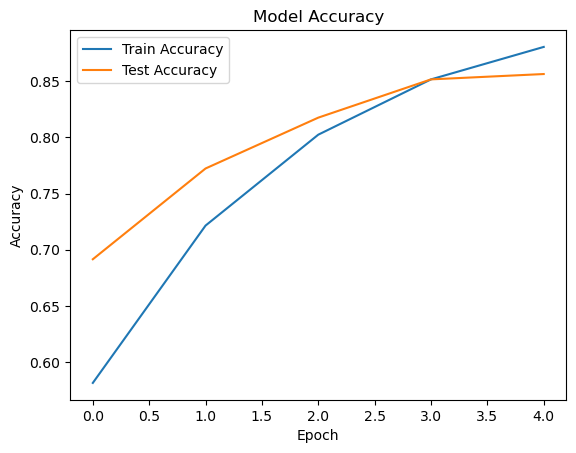

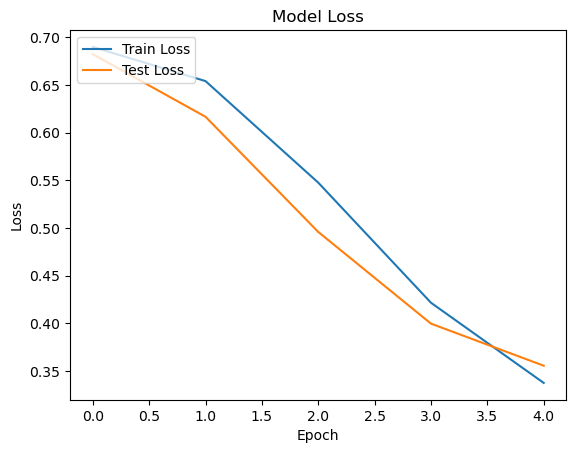

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()